In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst
import statsmodels.api as sm

from statsmodels.graphics.mosaicplot import mosaic

## 범주형 - 범주형

> - 시각화 : bar.stacked, mosaic

> - 검증 : 카이제곱 검정

In [2]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/credit_NA.csv"
usecols = ['Creditability','AccountBalance','Employment','SexMarital','CurrentAddress','CreditDuration','CreditAmount', 'Age']
credit = pd.read_csv(path, usecols=usecols)
credit.head(3)

,Creditability,AccountBalance,CreditDuration,CreditAmount,Employment,SexMarital,CurrentAddress,Age
0,1,3,24,1249,2,4,2,28.0
1,1,2,9,276,3,4,4,22.0
2,1,1,18,1049,2,2,4,21.0


#### AccountBalance(은행잔고) - Creditability(신용도)

In [3]:
pd.crosstab(credit['AccountBalance'], credit['Creditability'])

Creditability,0,1
AccountBalance,,
1,135,139
2,105,164
3,60,397


In [6]:
table = pd.crosstab(credit['AccountBalance'], credit['Creditability'], normalize='index')
table

Creditability,0,1
AccountBalance,,
1,0.492701,0.507299
2,0.390335,0.609665
3,0.131291,0.868709


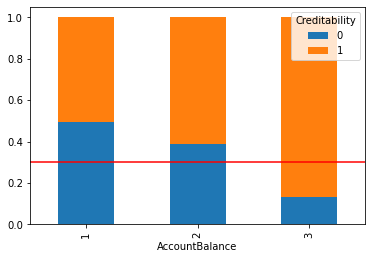

In [11]:
table.plot.bar(stacked=True)

tab_mean = credit['Creditability'].mean()
plt.axhline(1-tab_mean, color='r')
plt.show()

> 평균과 차이들이 크기 때문에 상관있다고 해석.

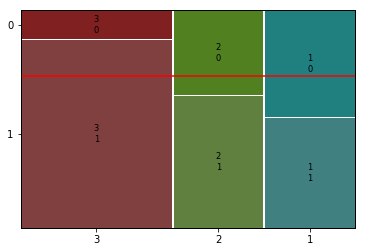

In [12]:
mosaic(credit,['AccountBalance', 'Creditability'])

plt.axhline(tab_mean, color='r')
plt.show()

#### 검정

In [17]:
table = pd.crosstab(credit['AccountBalance'], credit['Creditability'])
result = spst.chi2_contingency(table)
print('카이제곱 값 :', result[0])
print('p-value :', result[1])
print('자유도 :', result[2])
print('기대도수\n', result[3])

카이제곱 값 : 120.84376361168343
p-value : 5.7426208775458905e-27
자유도 : 2
기대도수
 [[ 82.2 191.8]
 [ 80.7 188.3]
 [137.1 319.9]]
